# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


### Libraries

In [1]:
#libraries 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np
import copy

#seed
seed = 99

In [2]:
#silencing future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Dataset Creation

Creating four datasets (two-dimensional, two classes) using sklearn.datasets.make_blobs, sklearn.datasets.make_circles, and sklearn.datasets.make_moons, such that each dataset highlights situations where specific classification models perform well. 

* Dataset 1: All classification models should perform well.
* Dataset 2: Quadratic-based models should perform well.
* Dataset 3: Decision Tree and KNN overfit, but logistic regression performs well.
* Dataset 4: SVM and KNN perform better than the others. 

In [3]:
#create dataset 1 using make_blobs
x1, y1 = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=seed)

In [4]:
#create dataset 2 using make_circles
x2,y2 = make_circles(n_samples=5000, noise=.2, factor=.1, random_state=seed)
#boolean mask such that feature 2 of x2 is greater than 0
mask = x2[:,1]>0
#apply boolean mask to filter
x2=x2[mask]
y2=y2[mask]

In [5]:
#create dataset 3 with make_blobs, defining centers of blobs, such that the decision boundary is linear, but is not completely separable  
x3, y3 = make_blobs(n_samples=[1250,1250,1250,1250], n_features=2, centers=[[1.2,1.5],[.5,1.5],[1.2,1],[.5,1]], cluster_std=.2,random_state=seed)
#using boolean masks to reduce to only 2 classes 
y3[(y3==1)]=0
y3[(y3!=0)]=1

In [6]:
#create dataset 4 using a combination of make_moons and make_blobs 
x4_1, y4_1 = make_moons(2500, noise=.2, random_state=seed)
x4_2, y4_2 = make_blobs(n_samples=[625,625], n_features=2, centers=[[3,.5],[-2,0]],cluster_std=.2)
x4_3, y4_3 = make_blobs(n_samples=[625,625], n_features=2, centers=[[1,-1.5],[0,1.75]],cluster_std=.2)
#vertically stacking the x data
x4 = np.vstack((x4_1,x4_2,x4_3))
#horizontally stacking the y data 
y4 = np.hstack((y4_1,y4_2,y4_3))

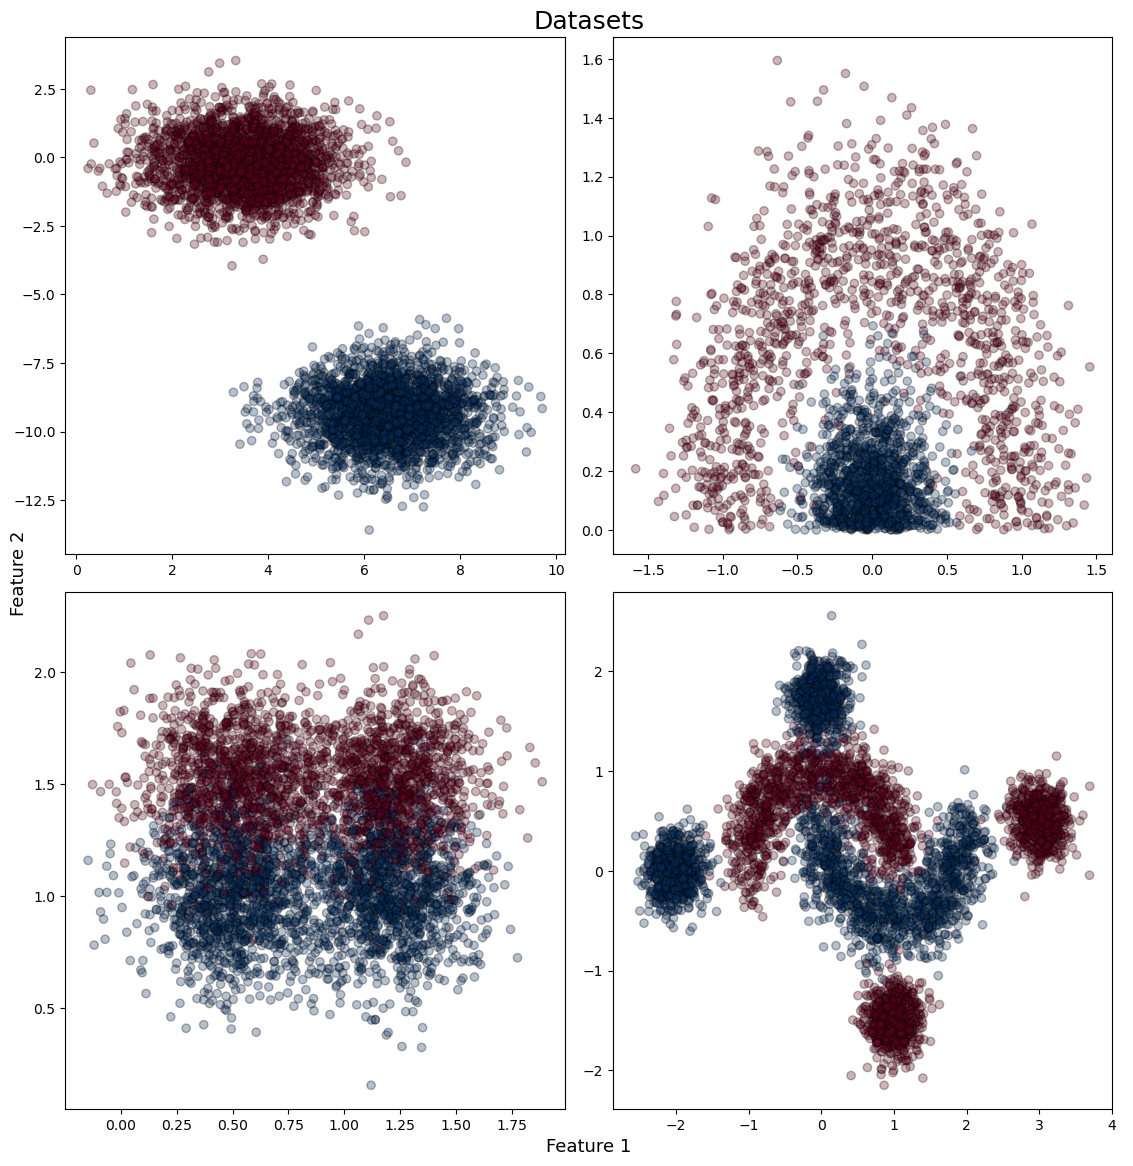

In [55]:
#plt color map
cmap = plt.cm.RdBu

#visualization of the created datasets 
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.ravel()

#scatterplots
ax[0].scatter(x=x1[:,0],y=x1[:,1], alpha=.3, c=y1, cmap=cmap, edgecolors="k")
ax[1].scatter(x=x2[:,0],y=x2[:,1], alpha=.3, c=y2, cmap=cmap, edgecolors="k")
ax[2].scatter(x=x3[:,0],y=x3[:,1], alpha=.3, c=y3, cmap=cmap, edgecolors="k")
ax[3].scatter(x=x4[:,0],y=x4[:,1], alpha=.3, c=y4, cmap=cmap, edgecolors="k")

#adding title, labels, etc. 
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Feature 1',fontsize=13)
plt.ylabel('Feature 2',fontsize=13)
plt.title('Datasets',fontsize=18)

plt.tight_layout()

Dataset 1 contains two well separated blobs. It is expected that all models should perform well at classification, due to the decision boundary being easily found, whether it is linear, quadratic, etc. 

Dataset 2 contains two classes where the decision boundary would be a quadratic. Linear classifiers like logistic regression should perform poorly. 

Dataset 3 contains two classes where there is not a clear decision boundary that separates the two. It is observed that a linear boundary could separate the majority of the data points correctly, but due to the overlapping nature of the data, other methods like KNN and decision tree should suffer from overfitting. 

Dataset 4 contains two classes that are not linearly separable. The boundary separating the two is more complex, leading to models like SVM with RBF kernal and KNN to perform better. 

### Train/Test Splitting & Functions for StandardScaler, Model Training, Model Predicting, and Classification Report

First, the datasets will be split into training and testing data. The training data will be used to train the models, and the testing data will be used to evaluate the final model performance. sklearn.model_selection.train_test_split will be used for train/test splitting. 

In [8]:
#train/test split, dataset 1
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state=seed)

#train/test split, dataset 2
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3, random_state=seed)

#train/test split, dataset 3
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.3, random_state=seed)

#train/test split, dataset 4
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.3, random_state=seed)


Second, the data will be standardized, due to certain models being affected by feature scaling (without feature scaling, models may perform poorly or overfit). The models affected are logistic regression, support vector machine, and KNN. The results of the other models will not be affected. The standard scaler is fit on the training data, and then both the training and testing data will be transformed. This sequence of steps is to ensure model fitting is not affected by the test data in any fashion. 

In [9]:
#function to perform standard scaler 
def std_sc(train,test):
    scaler = StandardScaler()
    return scaler.fit_transform(train), scaler.transform(test)
    
#perform standard scaler
x1_train, x1_test = std_sc(x1_train,x1_test)
x2_train, x2_test = std_sc(x2_train,x2_test)
x3_train, x3_test = std_sc(x3_train,x3_test)
x4_train, x4_test = std_sc(x4_train,x4_test)

Third, the models under investigation are stored in a dictionary, and a function to perfrom model training is defined. Within the function, the model is fit on the training data, such that the input features are x_train and the response variable is the class label in y_train. The models will use default parameters, with SVM using the RBF kernel and number of neighbors equaling 1 for this investigation.

Each models' fit function is used with the x_train/y_train data. 

In [10]:
#initializing and storing models in a dictionary for ease 
models = {'Naive Bayes':GaussianNB(),
          'Logistic Regression':LogisticRegression(random_state=seed),
          'Quadratic Discriminant Analysis':QuadraticDiscriminantAnalysis(),
          'Support Vector Machine (kernel=RBF)':SVC(kernel='rbf'),
          'Decision Tree':DecisionTreeClassifier(random_state=seed),
          'K-Nearest Neighbors (K=1)':KNeighborsClassifier(n_neighbors=1)
          }

In [11]:
#function for model training 
def model_training(models,x,y):
    new_models=copy.deepcopy(models)
    trained_models = {}
    for name, model in new_models.items():
        trained_models[name]=model.fit(x,y)
    return trained_models

Next, a function to handle returning the predictions resulting from the trained models and an input array of features x is created. The function will return a dictionary with model names as keys and the predictions as values. Predictions on both the training and testing data will be computed to evaluate if there is any overfitting or underfitting. 

The models' predict function is used with the x data. 

In [12]:
#function for returning y_pred for trained_models 
def predictions(models,x):
    predictions = {}
    for name, model in models.items():
        predictions[name]=model.predict(x)
    return predictions

sklearn.metrics.classification_report is used to evaluate the performance of the models, and is used in a function that returns the model names as keys and the reports as values. 

In [13]:
#function for returning the classification report for trained_models predictions  
def class_reports(predictions,y_true):
    reports = {}
    for name,y_pred in predictions.items():
        reports[name] = classification_report(y_true,y_pred)
    return reports

The below function helps with printing the results of the resulting classification reports. 

In [14]:
def print_reports(reports,text):
    print(text)
    for name,report in reports.items():
        print('===================================================')
        print(name)
        print(report)

### Investigation for Dataset 1

Using the functions/procedure defined above, the models are trained on dataset 1's training data. Predictions for both training and testing data are computed and classification reports for both training and testing data are returned. 

In [15]:
#training models on dataset 1
trained_models1 = model_training(models,x1_train,y1_train)
#predictions with trained models on dataset 1 
y1_preds_train = predictions(trained_models1,x1_train)
y1_preds_test = predictions(trained_models1,x1_test)
#classification reports for the predictions of the trained models on dataset 1 
reports1_train = class_reports(y1_preds_train,y1_train)
reports1_test = class_reports(y1_preds_test,y1_test)

In [16]:
print_reports(reports1_train,'Classification Report for Dataset 1, Train\n')

Classification Report for Dataset 1, Train

Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1740

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1740

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1740

    accuracy                           1.00      3500
   macro avg       1

In [17]:
print_reports(reports1_test,'Classification Report for Dataset 1, Test\n')

Classification Report for Dataset 1, Test

Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       760

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       760

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       760

    accuracy                           1.00      1500
   macro avg       1.

Takeaways from the classification reports for dataset 1:
* All models had a training accuracy of 100% and a testing accuracy of 100%. This is expected because dataset 1 contains two completely separable classes. As a result, no matter the shape of the decision boundary or the method by which the specific model derives its results, all models perform equally well. 

### Investigation for Dataset 2

Using the functions/procedure defined above, the models are trained on dataset 2's training data. Predictions for both training and testing data are computed and classification reports for both training and testing data are returned. 

In [18]:
#training models on dataset 2
trained_models2 = model_training(models,x2_train,y2_train)
#predictions with trained models on dataset 2 
y2_preds_train = predictions(trained_models2,x2_train)
y2_preds_test = predictions(trained_models2,x2_test)
#classification reports for the predictions of the trained models on dataset 2 
reports2_train = class_reports(y2_preds_train,y2_train)
reports2_test = class_reports(y2_preds_test,y2_test)

In [19]:
print_reports(reports2_train,'Classification Report for Dataset 2, Train\n')

Classification Report for Dataset 2, Train

Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       885
           1       0.99      0.95      0.97       893

    accuracy                           0.97      1778
   macro avg       0.97      0.97      0.97      1778
weighted avg       0.97      0.97      0.97      1778

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       885
           1       0.80      0.89      0.84       893

    accuracy                           0.83      1778
   macro avg       0.84      0.83      0.83      1778
weighted avg       0.84      0.83      0.83      1778

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       885
           1       0.99      0.95      0.97       893

    accuracy                           0.97      1778
   macro avg       0

In [20]:
print_reports(reports2_test,'Classification Report for Dataset 2, Test\n')

Classification Report for Dataset 2, Test

Naive Bayes
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       371
           1       0.99      0.91      0.95       392

    accuracy                           0.95       763
   macro avg       0.95      0.95      0.95       763
weighted avg       0.96      0.95      0.95       763

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       371
           1       0.78      0.88      0.83       392

    accuracy                           0.81       763
   macro avg       0.82      0.81      0.81       763
weighted avg       0.82      0.81      0.81       763

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       371
           1       0.99      0.91      0.95       392

    accuracy                           0.95       763
   macro avg       0.

Takeaways from the classification reports for dataset 2: 
* Naive Bayes and Quadratic Discriminant Analysis 
    * Naive Bayes and Quadratic Discriminant Analysis produces quadratic decision boundaries, which fits well in separating the classes in dataset 2. This is reflected by it having a higher training and testing error than logistic regression, which produces a linear decision boundary. In addition, they both perform almost as well as the best forming models on this dataset. 
    
* Logistic Regression
    * Logistic Regression performed the worst in both training and testing accuracy when compared to the other models. This is due to the data not being linearly separable.
    
* Support Vector Machine 
    * SVM with RBF kernel has the best test accuracy. This is due to the ability of the SVM with RBF kernel to make nonlinear decision boundary that may be more complex than those created by Naive Bayes or QDA. 
    
* KNN and Decision Tree 
    * Both models perform equally well in both training and testing accuracy. Both models are able to create complex decision boundaries, especially when K=1 for KNN and if model complexity is not restricted for Decision Tree. 
    
No models seem to have over or underfit. 

### Investigation for Dataset 3

Using the functions/procedure defined above, the models are trained on dataset 3's training data. Predictions for both training and testing data are computed and classification reports for both training and testing data are returned. 

In [21]:
#training models on dataset 3
trained_models3 = model_training(models,x3_train,y3_train)
#predictions with trained models on dataset 3 
y3_preds_train = predictions(trained_models3,x3_train)
y3_preds_test = predictions(trained_models3,x3_test)
#classification reports for the predictions of the trained models on dataset 3
reports3_train = class_reports(y3_preds_train,y3_train)
reports3_test = class_reports(y3_preds_test,y3_test)

In [22]:
print_reports(reports3_train,'Classification Report for Dataset 3, Train\n')

Classification Report for Dataset 3, Train

Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1753
           1       0.89      0.90      0.89      1747

    accuracy                           0.89      3500
   macro avg       0.89      0.89      0.89      3500
weighted avg       0.89      0.89      0.89      3500

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1753
           1       0.89      0.90      0.89      1747

    accuracy                           0.89      3500
   macro avg       0.89      0.89      0.89      3500
weighted avg       0.89      0.89      0.89      3500

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1753
           1       0.89      0.90      0.89      1747

    accuracy                           0.89      3500
   macro avg       0

In [23]:
print_reports(reports3_test,'Classification Report for Dataset 3, Test\n')

Classification Report for Dataset 3, Test

Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       747
           1       0.89      0.90      0.90       753

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500

Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       747
           1       0.89      0.90      0.89       753

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       747
           1       0.89      0.90      0.89       753

    accuracy                           0.89      1500
   macro avg       0.

Takeaways from the classification reports for dataset 3: 
* Logistic Regression
    * Logistic Regression performed well at a training accuracy of .89 and a testing accuracy of .89. From viewing the dataset 3 plot, it is apparent that the best decision boundary is likely close to linear-horizontal boundary, which logistic regression would be able to create. 

* Naive Bayes, Quadratic Discriminant Analysis, Support Vector Machine
    * All these models have similar performance at about .89 training/testing error. They match the performance of logistic regression due to the ability to create a similar boundary as described above. 
    
    
* Decision Tree 
    * The training accuracy is 1, while the testing accuracy is .84. This indicates that the Decision Tree is overfitted on the training data (high training accuracy, much lower testing accuracy). This is due to the data not being easily separated. Since some of class 1 exists in the region for class 2, an unbounded decision tree may partition the boundary space too much when fitting on the training data, thus not being able to generalize well. 
    
* KNN
    * The training accuracy is 1, while the testing accuracy is .83. This also indicates that KNN has overfitted on the training data. With the hyperparameter K = 1, the KNN model will find the closest neighbor and then classify based on the neighbor's label. Due to the data not being easily separated, the KNN model is overfit on the training data and does not generalize well. 

### Investigation for Dataset 4

Using the functions/procedure defined above, the models are trained on dataset 4's training data. Predictions for both training and testing data are computed and classification reports for both training and testing data are returned. 

In [24]:
#training models on dataset 4
trained_models4 = model_training(models,x4_train,y4_train)
#predictions with trained models on dataset 4
y4_preds_train = predictions(trained_models4,x4_train)
y4_preds_test = predictions(trained_models4,x4_test)
#classification reports for the predictions of the trained models on dataset 4
reports4_train = class_reports(y4_preds_train,y4_train)
reports4_test = class_reports(y4_preds_test,y4_test)

In [25]:
print_reports(reports4_train,'Classification Report for Dataset 4, Train\n')

Classification Report for Dataset 4, Train

Naive Bayes
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1763
           1       0.60      0.63      0.62      1737

    accuracy                           0.61      3500
   macro avg       0.61      0.61      0.61      3500
weighted avg       0.61      0.61      0.61      3500

Logistic Regression
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1763
           1       0.62      0.62      0.62      1737

    accuracy                           0.62      3500
   macro avg       0.62      0.62      0.62      3500
weighted avg       0.62      0.62      0.62      3500

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1763
           1       0.60      0.64      0.62      1737

    accuracy                           0.61      3500
   macro avg       0

In [26]:
print_reports(reports4_test,'Classification Report for Dataset 4, Test\n')

Classification Report for Dataset 4, Test

Naive Bayes
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       737
           1       0.62      0.65      0.63       763

    accuracy                           0.62      1500
   macro avg       0.62      0.62      0.62      1500
weighted avg       0.62      0.62      0.62      1500

Logistic Regression
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       737
           1       0.64      0.63      0.63       763

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500

Quadratic Discriminant Analysis
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       737
           1       0.62      0.65      0.64       763

    accuracy                           0.62      1500
   macro avg       0.

Takeaways from the classification reports for dataset 4: 
* Naive Bayes, Logistic Regression, Quadratic Discriminant Analysis
    * These three models are limited in the shape that they can create with their decision boundaries, with logistic regression being linear and Naive Bayes/Quadratic Discriminant Analysis being quadratic. Dataset 4's figure shows that there is no way to separate the classes with a linear or quadratic decision boundary. As a result, the training and testing accuracy for these models are low (~60).  

* Support Vector Machine 
    * Support Vector Machines with an RBF kernel are able to use tranformations to put the features of the input data in a higher dimensional space to find a decision boundary that is linear in that higher dimensional space. As a result, it is able to create complex decision boundaries in the original dimensional space of the input data. This is reflected by SVM performing well at a training accuracy of .94 and a testing accuracy of .93. 
    
    
* Decision Tree 
    * The Decision Tree also performs well with Dataset 4, with a training and testing accuracy of 1 and .96. This is due to the ability of Decision Trees to partition the boundary space into many partitions, thus creating complex decision boundaries, that can separate the two classes well. 
    
* KNN
    * The KNN model performs well when data is clearly separable, especially if the hyperparameter K = 1. With lower K, the complexity of the decision boundary increases. As a result, a KNN model (K=1) will be able to differentiate between the two classes of dataset 4 with low error. 

### Classifier Comparison

To further illustrate the observations discussed above, the decision boundaries for each model on each dataset will be visualized. This will be accomplished using sklearn.inspection.DecisionBoundaryDisplay. The models are trained on the training data for each dataset, but the visualizations will include both training and testing data to better visualize how well each model does at stratifying the two classes. 

A function to produce the decision boundary figure is used for convenience, which implements the actions above. 

In [98]:
def boundary_figure(x_train,x_test,y_train,y_test,models):
    #visualization of the created datasets 
    fig, ax = plt.subplots(3,2,figsize=(12,12))
    ax = ax.ravel()
    pos=0
    
    #combining training and testing data 
    x = np.vstack((x_train,x_test))
    y = np.hstack((y_train,y_test))
    
    #for loop to populate subplot with illustrations of the decision boundaries
    for name, model in models.items():
        DecisionBoundaryDisplay.from_estimator(model,x_train,alpha=.5,ax=ax[pos],cmap=cmap)
        ax[pos].scatter(x=x[:,0],y=x[:,1], alpha=.05,c=y,cmap=cmap)
        ax[pos].title.set_text(name)
        pos+=1


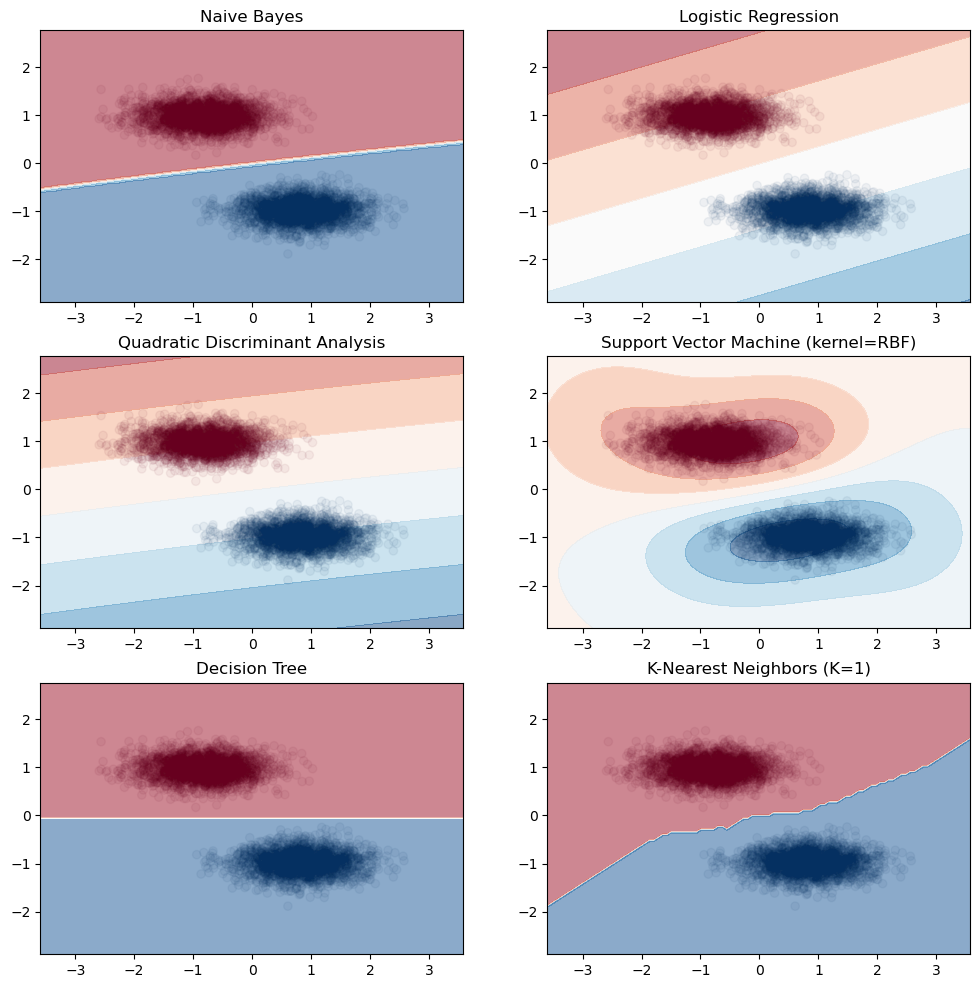

In [99]:
#decision boundaries for dataset 1
boundary_figure(x1_train,x1_test,y1_train,y1_test,trained_models1)

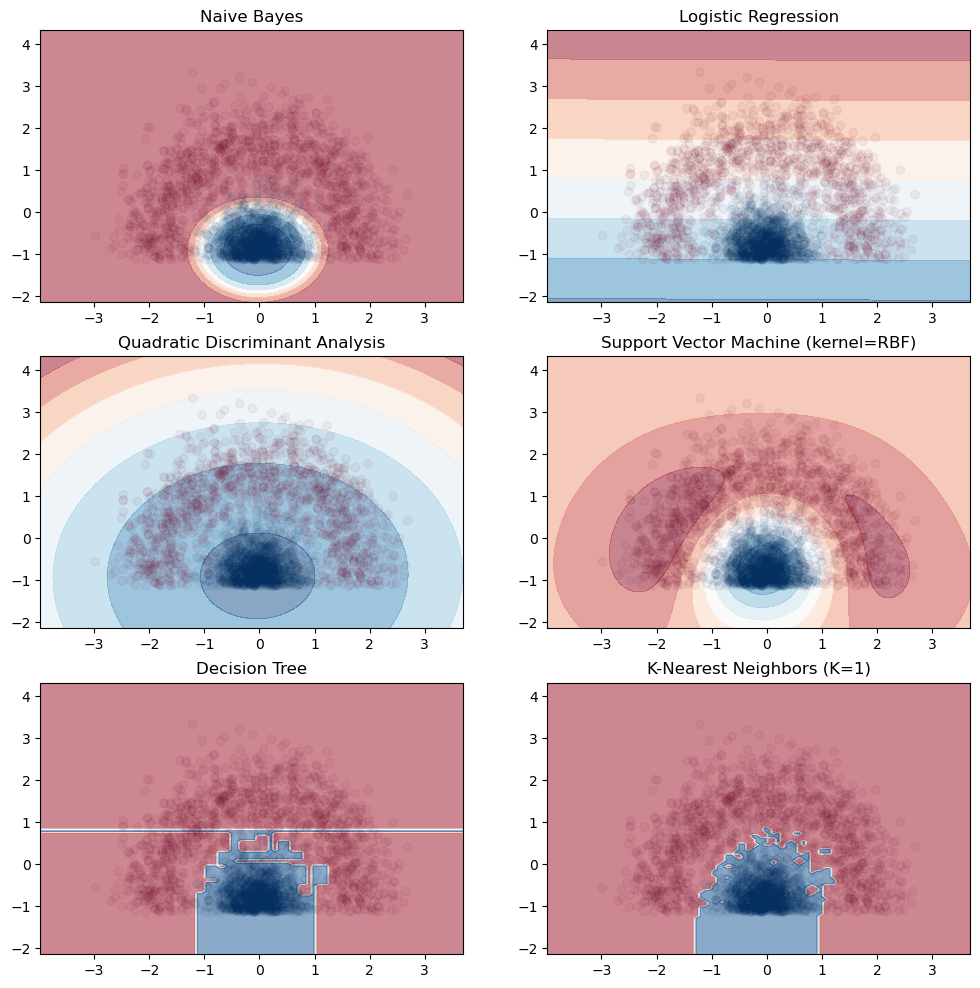

In [100]:
#decision boundaries for dataset 2 
boundary_figure(x2_train,x2_test,y2_train,y2_test,trained_models2)

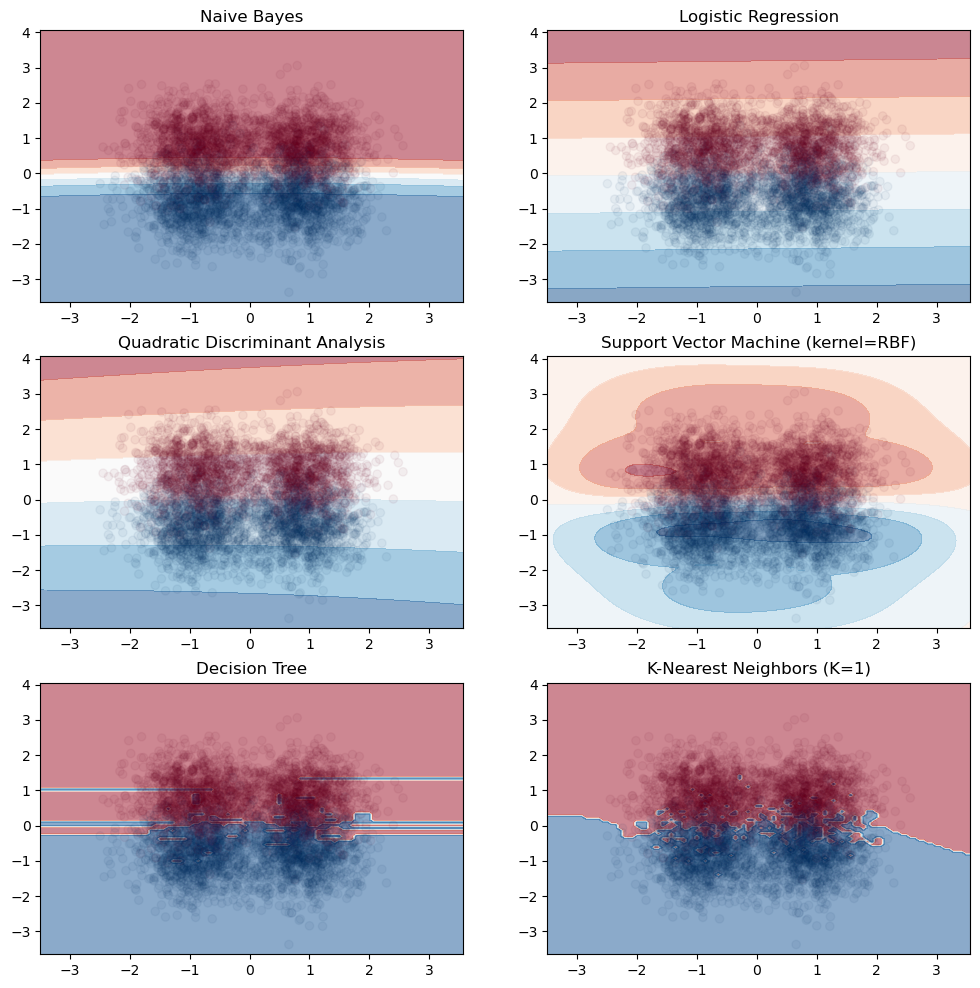

In [101]:
#decision boundaries for dataset 3
boundary_figure(x3_train,x3_test,y3_train,y3_test,trained_models3)

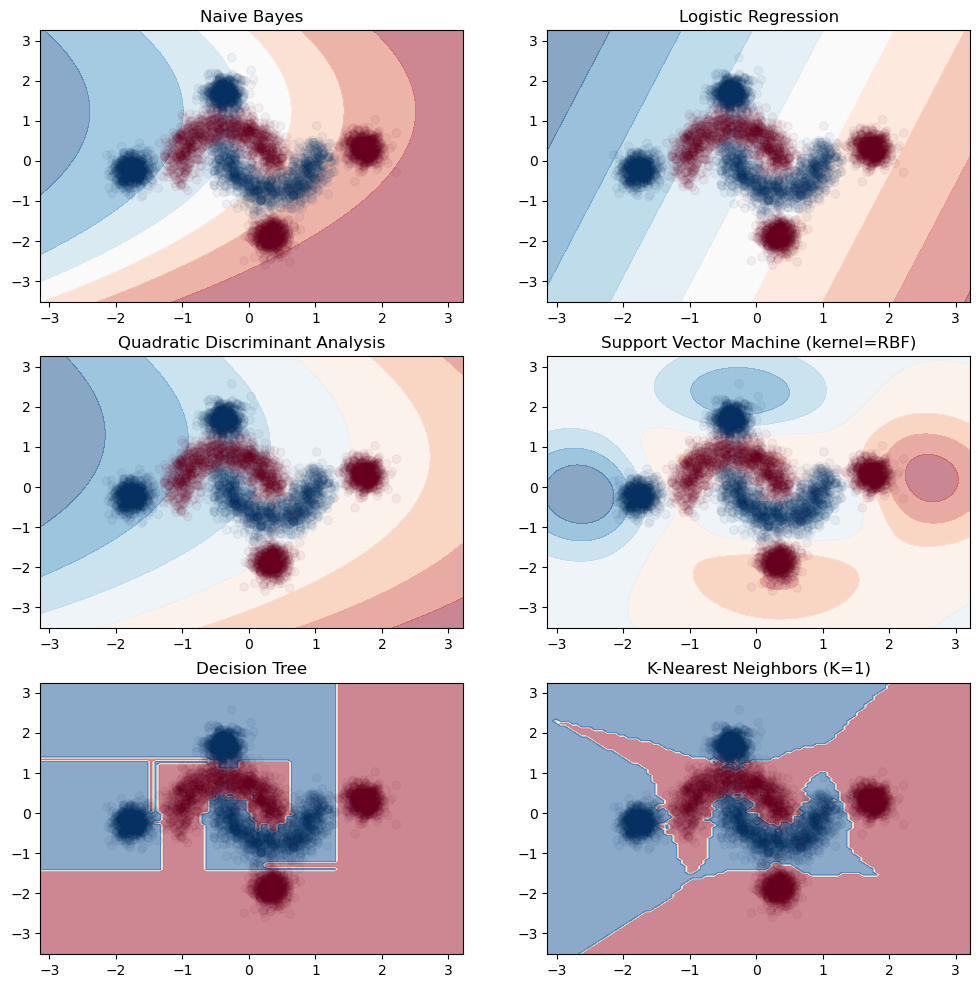

In [102]:
#decision boundaries for dataset 4
boundary_figure(x4_train,x4_test,y4_train,y4_test,trained_models4)

The decision boundaries produced by the investigated models for this two-dimensional dataset highlights the differences in the classifiers' boundaries and how they classify data. This fact informs us that certain models are better suited for different data, and characteristics like linear separability, noise, etc. are important to study when choosing the best model. 